# The Spark Foundation -GRIP- Data science and Business Analytics 

## Task 2 : Prediction using Unsupervised ML

what is Unsupervised learning?

        1. in unsupervised learning data is not labelled
        2. Model itself finds the patterns.
        3. Exemples are K-Means Clustering,PCA

### Author: Yasmine SMIDA

In this task we will use the given 'iris' dataset ,to predict the optimum number of clusters and represent it visually

we will use the https://bit.ly/3kXTdox dataset

## 1 import and load data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [15]:
#iris=datasets.load_iris()
#data=pd.DataFrame(iris.data,columns=iris.feature_names)

In [22]:
data=pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 2 Exploratory Data Analysis and Visualization

In [25]:
data.describe().round()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.0,150.0,150.0,150.0,150.0
mean,76.0,6.0,3.0,4.0,1.0
std,43.0,1.0,0.0,2.0,1.0
min,1.0,4.0,2.0,1.0,0.0
25%,38.0,5.0,3.0,2.0,0.0
50%,76.0,6.0,3.0,4.0,1.0
75%,113.0,6.0,3.0,5.0,2.0
max,150.0,8.0,4.0,7.0,2.0


In [26]:
data.shape

(150, 6)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [29]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [30]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [32]:
species_dist=pd.crosstab(index=data["Species"],columns="counts")
species_dist

col_0,counts
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


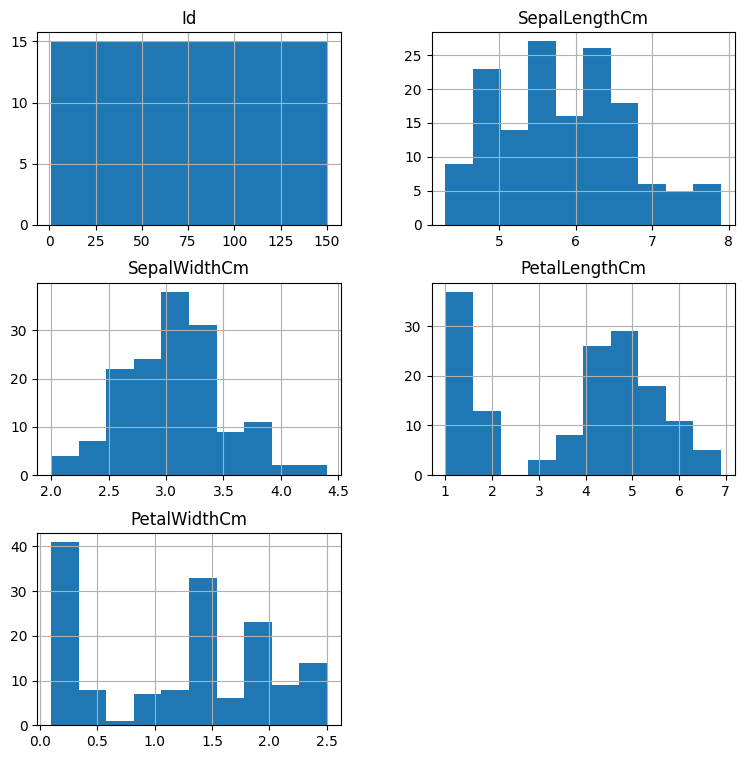

In [35]:
data.hist(figsize=(9,9))
plt.show()

In [37]:
!pip install plotly

     ---------------------------------------- 15.6/15.6 MB 1.2 MB/s eta 0:00:00


In [45]:
import plotly.express as px

In [51]:
fig=px.scatter(data,x='SepalWidthCm',y="SepalLengthCm",color='Species')
fig.show()

In [53]:
fig=px.scatter(data,x='PetalWidthCm',y="PetalLengthCm",color='Species')
fig.show()

## 3.Finding the optimal number of clusters for K Means Classification

For this unsupervised ML problem, we are using K-Means Clustering Algorithm for dividing whole data into different clusters.Main challenge for K Means is to determine the number of cluster to beformed.

In [61]:
from sklearn.cluster import KMeans
X=data.iloc[:,[1,2,3,4]].values

In [70]:
wcss=[]
#within cluster sum of square(distance between the observations)
for i in range(1,11): #change the number of cluster each time
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

F:\newanaconda\envs\env_sid\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [71]:
wcss

[680.8244,
 152.36870647733906,
 78.94084142614601,
 57.31787321428571,
 46.56163015873016,
 38.930963049671746,
 34.19068792479663,
 30.06387443273313,
 27.842356060606065,
 26.048202248044355]

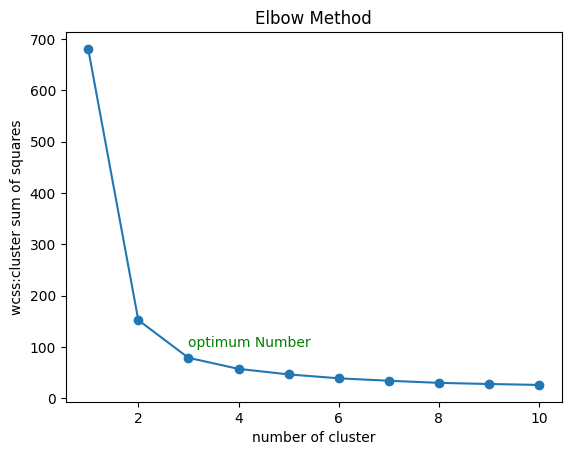

In [101]:
#the optimum number of clusters would be obtained at the elbow point
#let's plot a line graph of the results obtained and look for the elbow point
plt.plot(range(1,11),wcss,marker='o')
plt.title("Elbow Method")
plt.xlabel("number of cluster")
plt.ylabel("wcss:cluster sum of squares")
plt.annotate("optimum Number",(3,100),color="green")
plt.show()

the elbow point cames at 3
### According to the Elbow Method the most accurate value for number of clusters is 3

## 3.1 appling the K-mean

In [75]:
# Applying Kmeans to the dataset
kmeans=KMeans(init="k-means++",n_clusters=3,n_init=10,max_iter=300,random_state=0)
y_prd=kmeans.fit_predict(X)
#y represent the cluster label 0,1,2

## 3.2 Visualize the K mean

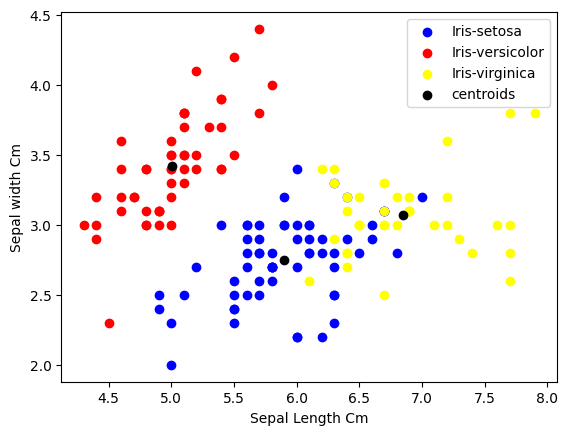

In [111]:
#visualising the clusters
                #cluster,column
plt.scatter(X[y_prd==0,0], X[y_prd==0,1],c="blue",label="Iris-setosa")
plt.scatter(X[y_prd==1,0], X[y_prd==1,1],c="red",label="Iris-versicolor")
plt.scatter(X[y_prd==2,0], X[y_prd==2,1],c="yellow",label="Iris-virginica")
plt.xlabel("Sepal Length Cm")
plt.ylabel("Sepal width Cm")
#plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="black",label="centroids")
#describe the elements of the graph
plt.legend()

For above, cluster=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

## 4. Making Prediction on unseen data

In [114]:
cluster=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
pred=kmeans.predict([[5.0,3.5,5.1,2.0]])
print(pred)
print(cluster[pred[0]])

[0]
Iris-setosa
